In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

In [2]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
tw = line.twiss()

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
num_particles = 100
num_turns = 1000

In [4]:
bpms_hor = ['bph.10208', 'bph.10408', 'bph.10608', 'bph.10808', 
            'bph.11008', 'bph.11208', 'bph.11408', 'bph.11608', 'bph.11831', 
            'bph.12008', 'bph.12208', 'bph.12408', 'bph.12608', 'bph.12808', 
            'bph.13008', 'bph.13208', 'bph.13408', 'bph.13608', 
            'bph.20208', 'bph.20408', 'bph.20608', 'bph.20808', 
            'bph.21008', 'bph.21208', 'bph.21408', 
            'bph.22008', 'bph.22208', 'bph.22408', 'bph.22608', 'bph.22808', 
            'bph.23008', 'bph.23208', 'bph.23408', 'bph.23608', 
            'bph.30208', 'bph.30408', 'bph.30608', 'bph.30808', 
            'bph.31008', 'bph.31208', 'bph.31408', 'bph.31608', 'bph.31808', 
            'bph.32008', 'bph.32208', 'bph.32408', 'bph.32608', 'bph.32808', 
            'bph.33008', 'bph.33208', 'bph.33408', 'bph.33608', 
            'bph.40208', 'bph.40408', 'bph.40608', 'bph.40808', 
            'bph.41008', 'bph.41208', 'bph.41408', 'bph.41607', #Mistake in bpm name (lsa name is bph.41608, not 7)
            'bph.42008', 'bph.42208', 'bph.42408', 'bph.42608', 'bph.42808', 
            'bph.43008', 'bph.43208', 'bph.43408', 'bph.43608', 
            'bph.50208', 'bph.50408', 'bph.50608', 'bph.50808', 
            'bph.51008', 'bph.51208', 'bph.51408', 
            'bph.52008', 'bph.52208', 'bph.52408', 'bph.52608', 'bph.52808', 
            'bph.53008', 'bph.53208', 'bph.53408', 'bph.53608', 
            'bph.60208', 'bph.60408', 'bph.60608', 'bph.60808', 
            'bph.61008', 'bph.61208', 'bph.61408', 'bph.61608', 
            'bph.62008', 'bph.62208', 'bph.62408', 'bph.62608', 'bph.62808', 
            'bph.63008', 'bph.63208', 'bph.63408', 'bph.63608']

In [5]:
# Insert monitors as bpms
env = line.env
insertions = []
monitors_elems = []
for name in bpms_hor:
    monitors_elems.append(xt.ParticlesMonitor(_context=line._context, 
                                                          num_particles=num_particles, 
                                                          start_at_turn=0, 
                                                          stop_at_turn=num_turns+1))
    env.elements[f'{name}_monitor'] = monitors_elems[-1]
    insertions.append(env.place(f'{name}_monitor', at=line.get_s_position(name)))
line.insert(insertions, s_tol=1e-6)

Slicing line:   0%|          | 0/3848 [00:00<?, ?it/s]

In [6]:
part = line.build_particles(
    x = tw.particle_on_co.x[0]*np.ones(num_particles),
    px = tw.particle_on_co.px[0]*np.ones(num_particles),
    y = tw.particle_on_co.y[0]*np.ones(num_particles),
    py = tw.particle_on_co.py[0]*np.ones(num_particles),
    zeta = tw.particle_on_co.zeta[0]*np.ones(num_particles),
    delta = np.linspace(-0.01, 0.01, num_particles)
)

In [7]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))

line.track(part, num_turns=num_turns, with_progress=True)

Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored
ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored


Done compiling ContextCpu kernels.


Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

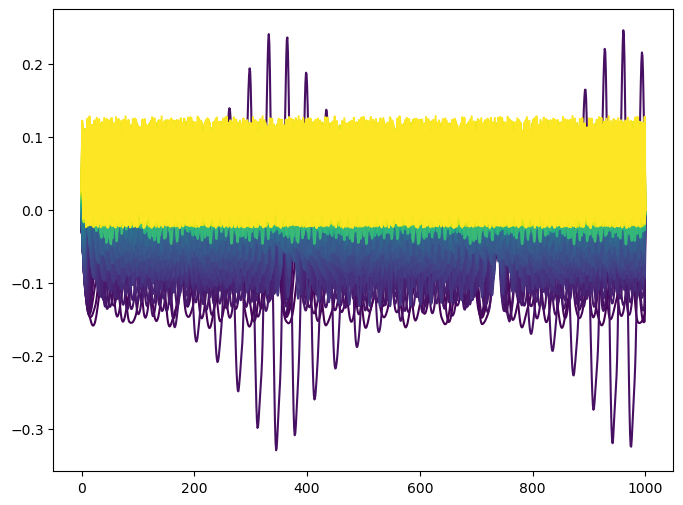

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= num_particles-1)
for i in range(num_particles):
    ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[i], color=colormap(norm(i)))

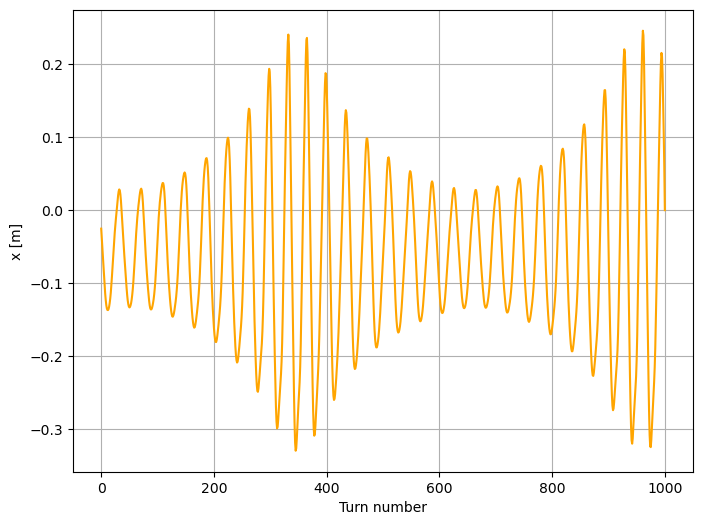

In [74]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
# ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[5], color='blue')
ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[4], color='orange') # initial delta is -0.00919192
ax.set_xlabel('Turn number')
ax.set_ylabel('x [m]')
ax.grid()

In [60]:
line.element_dict[f'{bpms_hor[0]}_monitor'].delta[:,0]

LinkedArrayCpu([-0.01      , -0.00979798, -0.00959596, -0.00939394,
                -0.00919192, -0.0089899 , -0.00878788, -0.00858586,
                -0.00838384, -0.00818182, -0.0079798 , -0.00777778,
                -0.00757576, -0.00737374, -0.00717172, -0.0069697 ,
                -0.00676768, -0.00656566, -0.00636364, -0.00616162,
                -0.0059596 , -0.00575758, -0.00555556, -0.00535354,
                -0.00515152, -0.00494949, -0.00474747, -0.00454545,
                -0.00434343, -0.00414141, -0.00393939, -0.00373737,
                -0.00353535, -0.00333333, -0.00313131, -0.00292929,
                -0.00272727, -0.00252525, -0.00232323, -0.00212121,
                -0.00191919, -0.00171717, -0.00151515, -0.00131313,
                -0.00111111, -0.00090909, -0.00070707, -0.00050505,
                -0.00030303, -0.00010101,  0.00010101,  0.00030303,
                 0.00050505,  0.00070707,  0.00090909,  0.00111111,
                 0.00131313,  0.00151515,  0.001

In [49]:
env.element_dict[f'{bpms_hor[0]}_monitor'].state[4][999]

np.int64(1)

In [30]:
env.element_dict[f'{bpms_hor[0]}_monitor'].x[0]

array([-0.02758931, -0.03588213, -0.04439391, ..., -0.14526005,
       -0.14259138,  0.        ], shape=(1001,))

In [14]:
part2 = line.build_particles(
    x = tw.particle_on_co.x[0]*np.ones(num_particles),
    px = tw.particle_on_co.px[0]*np.ones(num_particles),
    y = tw.particle_on_co.y[0]*np.ones(num_particles),
    py = tw.particle_on_co.py[0]*np.ones(num_particles),
    zeta = tw.particle_on_co.zeta[0]*np.ones(num_particles),
    delta = np.linspace(-0.01, 0.01, num_particles)
)

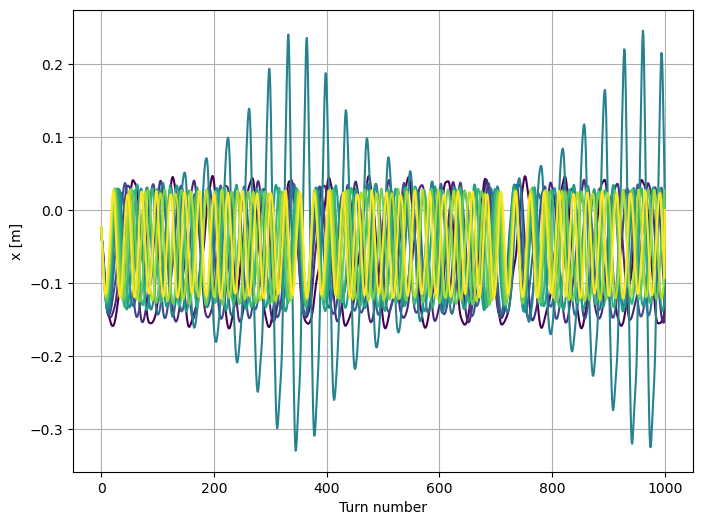

In [61]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
nn_plot = 10
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= nn_plot-1)
for i in range(nn_plot):
    ax.plot(line.element_dict[f'{bpms_hor[0]}_monitor'].x[i], color=colormap(norm(i))) # initial delta is -0.00919192
ax.set_xlabel('Turn number')
ax.set_ylabel('x [m]')
ax.grid()

In [65]:
tw.qs

np.float64(0.018208284493184124)

In [67]:
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

In [70]:
tw.rows[cavity_names].dx, tw.rows[cavity_names].name

(array([-0.44700814, -0.4505754 , -0.45414162, -0.45907659, -0.46264028,
        -0.46620292, -0.55974009, -0.64204634, -0.71633354, -0.79062025,
        -0.86490651, -1.00143257, -0.92418888, -0.84694485, -0.74001548,
        -0.66277042, -0.58552489, -0.43738987, -0.42634986, -0.41638439,
        -0.40641785, -0.39645022]),
 array(['actcse.31632', 'actcse.31637', 'actcse.31654', 'actcsf.31672',
        'actcsf.31678', 'actcsf.31695', 'acl.31735', 'actcsg.31751',
        'actcsg.31758', 'actcsg.31774', 'actcsg.31780', 'actcsh.31832',
        'actcsh.31838', 'actcsh.31854', 'actcsi.31872', 'actcsi.31878',
        'actcsi.31895', 'acl.31936', 'actcsj.31952', 'actcsj.31958',
        'actcsj.31974', 'actcsj.31991'], dtype=object))

In [72]:
np.min(tw.dx), np.max(tw.dx)

(np.float64(-1.0221539770753374), np.float64(7.971402017088949))

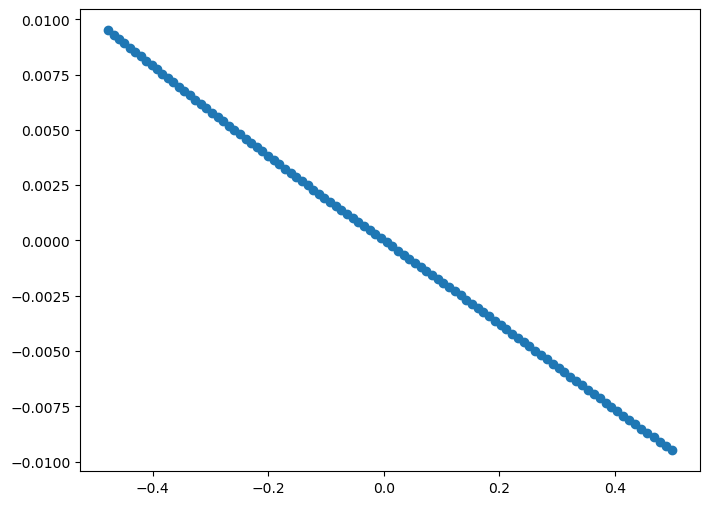

In [73]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.scatter(line.element_dict[f'{bpms_hor[0]}_monitor'].zeta[:,4], line.element_dict[f'{bpms_hor[0]}_monitor'].delta[:,4])

## FFT

In [ ]:
np.fft.fft(line.element_dict[f'{bpms_hor[0]}_monitor'].x[4]+1j*line.element_dict[f'{bpms_hor[0]}_monitor'].x[4])

array([-62.51038242-62.51038242j,  -0.8764779  +1.95324487j,
         3.9272755  -3.11589724j, ...,  -1.92088543 +0.26528561j,
        -3.11589724 +3.9272755j ,   1.95324487 -0.8764779j ],
      shape=(1001,))

<BarContainer object of 1001 artists>

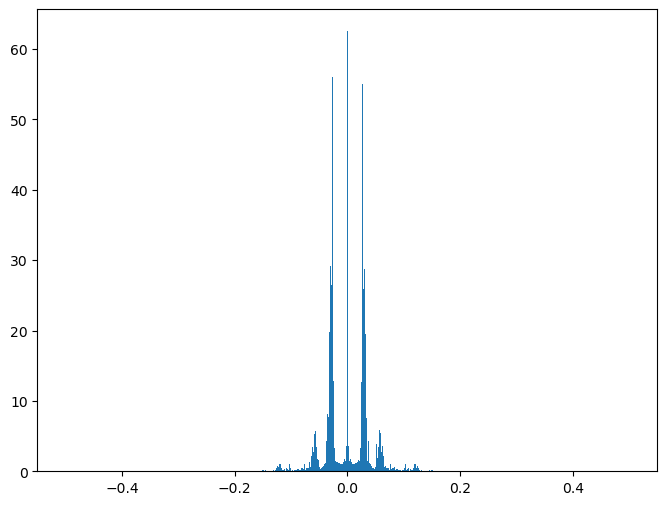

In [101]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
freq_cont = np.fft.fft(line.element_dict[f'{bpms_hor[0]}_monitor'].x[4]+1j*line.element_dict[f'{bpms_hor[0]}_monitor'].px[4])
freq = np.fft.fftfreq(len(freq_cont))
df = freq[1] - freq[0]  # frequency bin width

ax.bar(freq, np.abs(freq_cont),
       width=df, align='center')
# ax.plot(np.abs(freq_cont))

In [96]:
1/40000

2.5e-05

In [81]:
freq_cont

array([-62.51038242-62.51038242j,  -0.8764779  +1.95324487j,
         3.9272755  -3.11589724j, ...,  -1.92088543 +0.26528561j,
        -3.11589724 +3.9272755j ,   1.95324487 -0.8764779j ],
      shape=(1001,))